# 线性代数



In [2]:
# 标量

import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x /y, x ** y

# 向量

x = torch.arange(4)
x, x[3]

(tensor([0, 1, 2, 3]), tensor(3))

In [3]:
# 长度、维度
len(x), x.shape

# 矩阵

A = torch.arange(20).reshape(5, 4)
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A, A.T, B, B.T, B == B.T

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([[ 0,  4,  8, 12, 16],
         [ 1,  5,  9, 13, 17],
         [ 2,  6, 10, 14, 18],
         [ 3,  7, 11, 15, 19]]),
 tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

In [4]:
# 张量

X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [5]:
# 张量 ＋ 标量

a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

# 微积分练习

## 1. 绘制函数 $y=f(x)=x^3-\frac{1}{\pi}$ 和其在 $x=1$ 处切线的图像。

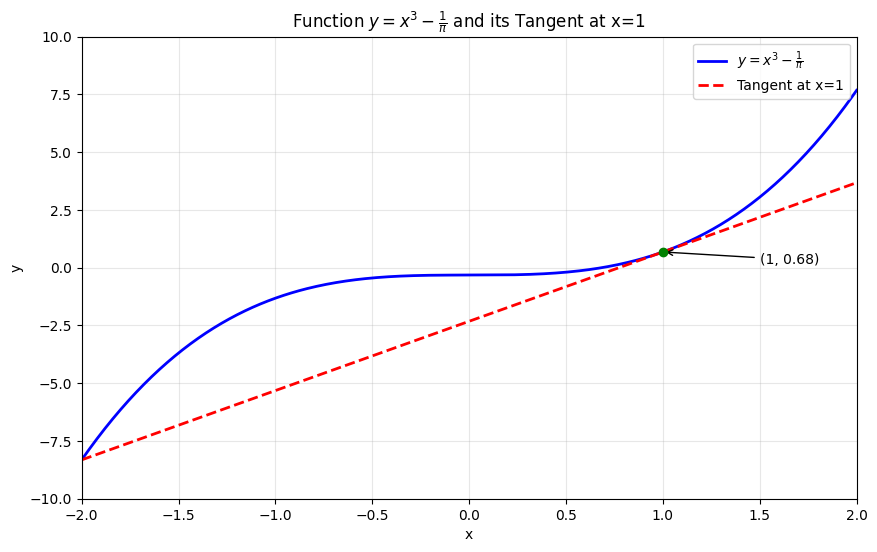

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x):
    return x**3 - 1/np.pi

# 定义切线函数
def tangent_line(x):
    return 3*(x - 1) + (1 - 1/np.pi)

# 生成 x 值
x_vals = np.linspace(-2, 2, 400)

# 计算对应的 y 值
y_vals = f(x_vals)
y_tangent = tangent_line(x_vals)

# 计算切点
x_tangent_point = 1
y_tangent_point = f(x_tangent_point)

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制函数图像
plt.plot(x_vals, y_vals, label=r'$y = x^3 - \frac{1}{\pi}$', color='blue', linewidth=2)

# 绘制切线
plt.plot(x_vals, y_tangent, label='Tangent at x=1', color='red', linestyle='--', linewidth=2)

# 标记切点
plt.scatter([x_tangent_point], [y_tangent_point], color='green', zorder=5)
plt.annotate(f'({x_tangent_point}, {y_tangent_point:.2f})', 
             xy=(x_tangent_point, y_tangent_point),
             xytext=(x_tangent_point+0.5, y_tangent_point-0.5),
             arrowprops=dict(arrowstyle='->'))

# 添加网格和标签
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Function $y = x^3 - \frac{1}{\pi}$ and its Tangent at x=1')
plt.legend()

# 设置坐标轴范围
plt.xlim(-2, 2)
plt.ylim(-10, 10)

# 显示图形
plt.show()

## 2. 求函数 $f(x) = 3x^4 + 5e^{x^2}$ 的梯度。

In [12]:
import sympy as sp
from IPython.display import display, Math

# 定义符号变量 x
x = sp.symbols('x')

# 定义函数 f(x)
f = 3 * x**4 + 5 * sp.exp(x**2)

# 计算梯度（导数）
gradient = sp.diff(f, x)

# 使用 LaTeX 格式显示结果
display(Math(r'\nabla f(x) = ' + sp.latex(gradient)))

<IPython.core.display.Math object>

# 自动求导

In [14]:
import torch

# 1. 创建需要求梯度的张量
x = torch.arange(4.0, requires_grad=True) # 标记x需要计算梯度

# 2. 在前向传播中定义计算（PyTorch会自动构建计算图）
y = 2 * torch.dot(x, x) # 计算 y = 2 * (x^T x)

print(y)

# 3. 通过调用 .backward() 进行反向传播，自动计算所有梯度
y.backward()

# 4. 访问梯度
print(x.grad) # 输出：tensor([ 0.,  4.,  8., 12.])

tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])


# 概率

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [ ]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

# 模拟掷骰子：6个面，每个面概率1/6
# torch.ones(6) 创建长度为6的全1张量，除以6得到均匀概率分布
fair_probs = torch.ones(6) / 6  # [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# 抽样：掷骰子500次
# multinomial.Multinomial(500, fair_probs) 创建多项式分布对象
# .sample() 方法从该分布中抽取500次试验的结果
counts = multinomial.Multinomial(500, fair_probs).sample()
print("500次掷骰子结果统计:", counts)
print("经验概率:", counts / 500)  # 计算经验概率，接近理论概率1/6≈0.1667

'''
函数作用解释：
1. torch.ones(): 创建指定形状的全1张量
2. multinomial.Multinomial(): 创建多项式分布，用于模拟多次独立试验
3. .sample(): 从分布中抽取样本
4. 大数定律：随着试验次数增加，经验概率收敛到理论概率
'''

500次掷骰子结果统计: tensor([94., 73., 86., 69., 98., 80.])
经验概率: tensor([0.1880, 0.1460, 0.1720, 0.1380, 0.1960, 0.1600])


In [11]:
# 条件概率示例：P(下雨|阴天) vs P(下雨)
# 假设一年的天气数据
total_days = 365       # 总天数
rainy_days = 100       # 下雨天数
cloudy_days = 150      # 阴天天数
cloudy_and_rainy = 80  # 既阴天又下雨的天数

# 无条件概率：P(下雨) = 下雨天数 / 总天数
# 表示不考虑任何条件时的下雨概率
P_rain = rainy_days / total_days
print(f"P(下雨) = {P_rain:.3f}")

# 条件概率：P(下雨|阴天) = P(下雨∩阴天) / P(阴天)
# 表示在已知是阴天的条件下，下雨的概率
P_rain_given_cloudy = cloudy_and_rainy / cloudy_days
print(f"P(下雨|阴天) = {P_rain_given_cloudy:.3f}")

'''
概念解释：
1. 无条件概率：事件发生的原始概率，不考虑任何其他信息
2. 条件概率：在已知某个事件发生的条件下，另一个事件发生的概率
3. 贝叶斯定理：P(A|B) = P(B|A)*P(A)/P(B)
   基于先验概率和新证据来更新概率估计
'''

P(下雨) = 0.274
P(下雨|阴天) = 0.533


'\n概念解释：\n1. 无条件概率：事件发生的原始概率，不考虑任何其他信息\n2. 条件概率：在已知某个事件发生的条件下，另一个事件发生的概率\n3. 贝叶斯定理：P(A|B) = P(B|A)*P(A)/P(B)\n   基于先验概率和新证据来更新概率估计\n'

In [ ]:
# 定义离散随机变量：掷骰子的点数
values = torch.tensor([1., 2., 3., 4., 5., 6.])  # 骰子可能的点数
probs = torch.ones(6) / 6  # 均匀分布，每个点数概率为1/6

# 期望（平均值）：E[X] = Σ(x_i * p_i)
# 表示随机变量的长期平均值或中心趋势
expectation = (values * probs).sum()  # 计算加权平均
print(f"期望值 E[X] = {expectation:.2f}")  # 输出：3.5

# 方差：Var[X] = E[(X - E[X])²] = Σ((x_i - μ)² * p_i)
# 衡量随机变量与其期望值的偏离程度，表示波动性
variance = ((values - expectation) ** 2 * probs).sum()
print(f"方差 Var[X] = {variance:.2f}")  # 输出：约2.92

'''
函数作用解释：
1. torch.tensor(): 创建张量，用于存储数值数据
2. .sum(): 对张量元素求和
3. 期望：描述随机变量的平均值或中心位置 
4. 方差：描述随机变量的离散程度或波动范围
'''

期望值 E[X] = 3.50
方差 Var[X] = 2.92


'\n函数作用解释：\n1. torch.tensor(): 创建张量，用于存储数值数据\n2. .sum(): 对张量元素求和\n3. 期望：描述随机变量的平均值或中心位置\n4. 方差：描述随机变量的离散程度或波动范围\n'

d:\developTools\conda\envs\d2l-cpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\developTools\conda\envs\d2l-cpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\developTools\conda\envs\d2l-cpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\developTools\conda\envs\d2l-cpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21248 (\N{CJK UNIFIED IDEOGRAPH-5300}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\developTools\conda\envs\d2l-cpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing f

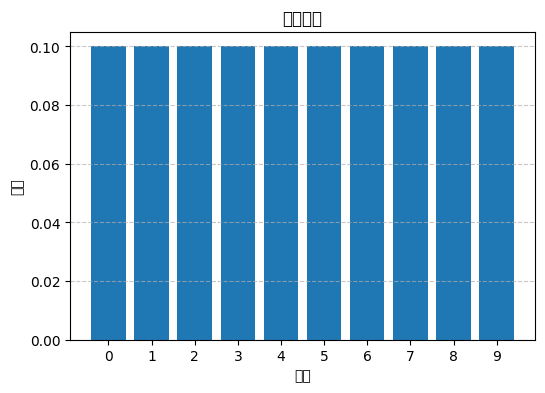

'\n函数作用解释：\n1. torch.ones(): 创建全1张量，用于构建均匀分布\n2. matplotlib.pyplot.bar(): 绘制条形图，可视化概率分布\n3. plt.show(): 显示图形\n4. 均匀分布：所有可能结果具有相同概率的分布\n'

In [15]:
import torch
import matplotlib.pyplot as plt

# 创建均匀分布
uniform_probs = torch.ones(10) / 10  # 10个结果，每个概率0.1

# 使用matplotlib直接绘制条形图
plt.figure(figsize=(6, 4))
plt.bar(range(len(uniform_probs)), uniform_probs.numpy())
plt.xlabel('结果')
plt.ylabel('概率')
plt.title('均匀分布')
plt.xticks(range(len(uniform_probs)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

'''
函数作用解释：
1. torch.ones(): 创建全1张量，用于构建均匀分布
2. matplotlib.pyplot.bar(): 绘制条形图，可视化概率分布
3. plt.show(): 显示图形
4. 均匀分布：所有可能结果具有相同概率的分布
'''

# 线性回归尝试

In [23]:
# Feature 数据
X = [[10, 3], [20, 3], [25, 3], [28, 2.5], [30, 2], [35, 2.5], [40, 2.5]]
y = [60, 85, 100, 120, 140, 145, 163]  # Label 数据
# 初始化参数
w = [0.0, 0.0, 0.0]  # w0, w1, w2
lr = 0.0001  # 学习率
num_iterations = 10000  # 迭代次数
# 梯度下降
for i in range(num_iterations):
    # 预测值
    y_pred = [w[0] + w[1] * x[0] + w[2] * x[1] for x in X]
    # 计算损失
    loss = sum((y_pred[j] - y[j]) ** 2 for j in range(len(y))) / len(y)
    # 计算梯度
    grad_w0 = 2 * sum(y_pred[j] - y[j] for j in range(len(y))) / len(y)
    grad_w1 = 2 * sum((y_pred[j] - y[j]) * X[j][0] for j in range(len(y))) / len(y)
    grad_w2 = 2 * sum((y_pred[j] - y[j]) * X[j][1] for j in range(len(y))) / len(y)
    # 更新参数
    w[0] -= lr * grad_w0
    w[1] -= lr * grad_w1
    w[2] -= lr * grad_w2
    # 打印损失
    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss}")
# 输出最终参数
print(f"Final parameters: w0 = {w[0]}, w1 = {w[1]}, w2 = {w[2]}")

Iteration 0: Loss = 14631.285714285714
Iteration 100: Loss = 76.144943048227
Iteration 200: Loss = 75.34515908380763
Iteration 300: Loss = 74.58501440666258
Iteration 400: Loss = 73.86251347394905
Iteration 500: Loss = 73.17576121076728
Iteration 600: Loss = 72.52295795197715
Iteration 700: Loss = 71.90239463868157
Iteration 800: Loss = 71.31244825654672
Iteration 900: Loss = 70.75157750378692
Iteration 1000: Loss = 70.21831867724987
Iteration 1100: Loss = 69.71128176562073
Iteration 1200: Loss = 69.22914673931989
Iteration 1300: Loss = 68.7706600271886
Iteration 1400: Loss = 68.33463117056202
Iteration 1500: Loss = 67.91992964579549
Iteration 1600: Loss = 67.52548184676445
Iteration 1700: Loss = 67.15026821928475
Iteration 1800: Loss = 66.79332053980403
Iteration 1900: Loss = 66.45371933109946
Iteration 2000: Loss = 66.13059140808637
Iteration 2100: Loss = 65.8231075471858
Iteration 2200: Loss = 65.53048027302972
Iteration 2300: Loss = 65.25196175659896
Iteration 2400: Loss = 64.98684

## 问题

1. 梯度计算即求偏导数，为什么会这样求，属于数学问题，即矩阵偏导数求导

# PyTorch初识



In [24]:
import torch
import numpy as np

# 1D Tensor
t1 = torch.tensor([1, 2, 3])
print(t1)

# 2D Tensor
t2 = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(t2)

# 3D Tensor
t3 = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(t3)

# 从 NumPy 创建 Tensor
arr = np.array([1, 2, 3])
t_np = torch.tensor(arr)
print(t_np)

tensor([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
tensor([1, 2, 3], dtype=torch.int32)


In [26]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## PyTorch自动求梯度

In [27]:
import torch

x = torch.tensor(1.0, requires_grad=True) #指定需要计算梯度
y = torch.tensor(1.0, requires_grad=True) #指定需要计算梯度
v = 3*x+4*y
u = torch.square(v)
z = torch.log(u)

z.backward() #反向传播求梯度

print("x grad:", x.grad)
print("y grad:", y.grad)

x grad: tensor(0.8571)
y grad: tensor(1.1429)


## 用PyTorch实现线性回归

### 生成训练数据

In [35]:
import torch

# 确保CUDA可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 生成数据
inputs = torch.rand(100, 3) # 随机生成shape为(100,3)的tensor，里边每个元素的值都是0-1之间
weights = torch.tensor([[1.1], [2.2], [3.3]]) #预设的权重
bias = torch.tensor(4.4) #预设的bias
targets = inputs @ weights + bias + 0.1*torch.randn(100, 1) #增加一些误差，模拟真实情况

### 初始化线性回归的参数

In [29]:
# 初始化参数时直接放在CUDA上，并启用梯度追踪
w = torch.rand((3, 1), requires_grad=True, device=device)
b = torch.rand((1,), requires_grad=True, device=device)

### 进行训练

In [31]:
# 将数据移至相同设备
inputs = inputs.to(device)
targets = targets.to(device)

#设置超参数
epoch = 10000
lr = 0.003

for i in range(epoch):
    outputs = inputs @ w + b
    loss = torch.mean(torch.square(outputs - targets))
    print("loss:", loss.item())

    loss.backward()

    with torch.no_grad(): #下边的计算不需要跟踪梯度
        w -= lr * w.grad
        b -= lr * b.grad

    # 清零梯度
    w.grad.zero_()
    b.grad.zero_()

print("训练后的权重 w:", w)
print("训练后的偏置 b:", b)

loss: 0.009574426338076591
loss: 0.009574417024850845
loss: 0.009574409574270248
loss: 0.009574388153851032
loss: 0.009574384428560734
loss: 0.009574361145496368
loss: 0.009574349969625473
loss: 0.00957433506846428
loss: 0.009574315510690212
loss: 0.009574311785399914
loss: 0.009574299678206444
loss: 0.009574280120432377
loss: 0.009574271738529205
loss: 0.009574252180755138
loss: 0.009574243798851967
loss: 0.009574227035045624
loss: 0.009574218653142452
loss: 0.009574200958013535
loss: 0.009574193507432938
loss: 0.009574159048497677
loss: 0.009574166499078274
loss: 0.009574146009981632
loss: 0.009574136696755886
loss: 0.00957412552088499
loss: 0.00957411527633667
loss: 0.009574098512530327
loss: 0.00957408081740141
loss: 0.009574067778885365
loss: 0.009574057534337044
loss: 0.009574037976562977
loss: 0.009574027732014656
loss: 0.009574014693498611
loss: 0.00957401655614376
loss: 0.009573998861014843
loss: 0.009573972783982754
loss: 0.009573965333402157
loss: 0.009573950432240963
loss: 

### 归一化和标准化

比较归一化和标准化

C:\Users\27177\AppData\Local\Temp\ipykernel_12744\1859565739.py:40: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
C:\Users\27177\AppData\Local\Temp\ipykernel_12744\1859565739.py:40: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
C:\Users\27177\AppData\Local\Temp\ipykernel_12744\1859565739.py:40: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
C:\Users\27177\AppData\Local\Temp\ipykernel_12744\1859565739.py:40: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
C:\Users\27177\AppData\Local\Temp\ipykernel_12744\1859565739.py:40: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from current font.
  plt.tight_layout()
C:\Users\27177\AppData\Local\Temp\ipykernel_12744\1859565739.py:40: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) miss

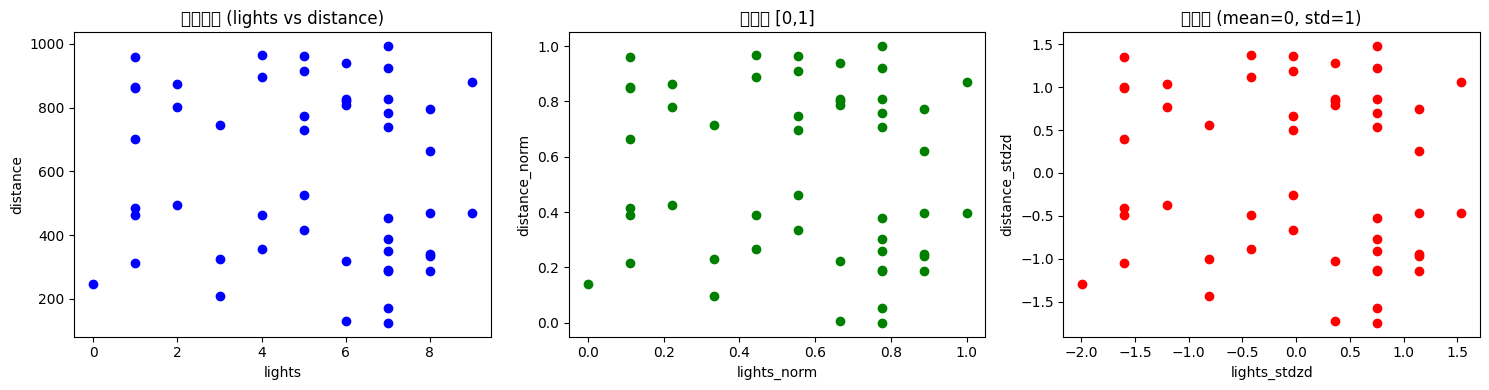

In [36]:
import torch
import matplotlib.pyplot as plt

# 1. 构造原始数据
lights = torch.randint(0, 10, (50,)).float()      # 红绿灯数量 (0~9)
distance = torch.randint(100, 1000, (50,)).float() # 距离 (100~1000)
X = torch.stack([lights, distance], dim=1)

# 2. 归一化 (Min-Max Normalization, [0,1])
X_min = X.min(dim=0).values
X_max = X.max(dim=0).values
X_norm = (X - X_min) / (X_max - X_min)

# 3. 标准化 (Z-score Standardization, 均值0, 方差1)
X_mean = X.mean(dim=0)
X_std = X.std(dim=0)
X_stdzd = (X - X_mean) / X_std

# 4. 可视化对比
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# 原始数据
axs[0].scatter(X[:,0], X[:,1], c="blue")
axs[0].set_title("原始数据 (lights vs distance)")
axs[0].set_xlabel("lights")
axs[0].set_ylabel("distance")

# 归一化后
axs[1].scatter(X_norm[:,0], X_norm[:,1], c="green")
axs[1].set_title("归一化 [0,1]")
axs[1].set_xlabel("lights_norm")
axs[1].set_ylabel("distance_norm")

# 标准化后
axs[2].scatter(X_stdzd[:,0], X_stdzd[:,1], c="red")
axs[2].set_title("标准化 (mean=0, std=1)")
axs[2].set_xlabel("lights_stdzd")
axs[2].set_ylabel("distance_stdzd")

plt.tight_layout()
plt.show()
